In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import time
from bertopic import BERTopic
from wordcloud import WordCloud

C:\Users\joshu\AppData\Roaming\Python\Python311\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\joshu\AppData\Roaming\Python\Python311\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\joshu\AppData\Roaming\Python\Python311\site-packages\umap\distanc

In [6]:
print("Importing data and building DataFrame:")
start_time = time.time()
with open('data/combinedData.json', 'r') as f:
    data = json.load(f)
end_time = time.time()
load_time = end_time - start_time
print("Data load time", load_time)
print(data[0])

Importing data and building DataFrame:
Data load time 0.01599907875061035
{'id': 'EJ1292238', 'title': 'What Makes a Good-Quality Language MOOC? An Empirical Study of Criteria to Evaluate the Quality of Online Language Courses from Learners&apos; Perspectives', 'author': 'Luo, Rong, Ye, Zixuan', 'description': "This paper focuses on quality assurance in language massive open online courses (LMOOCs). It is a qualitative study that adopts the grounded theory method and analyses evaluative comments on the quality of LMOOCs from learners' perspectives. With the data collected from 1,000 evaluations from English as a second language (ESL) learners on China's biggest MOOC platform &quot;iCourse&quot;, this study examines what has influenced learners' perceptions of LMOOCs and identifies the specific quality criteria of five types of them, including ESL courses for speaking, reading, writing, cultural studies, and integrated skills. The results of the study will lay a foundation for the estab

In [7]:
print("Data loaded, converting to DataFrame")
start_time = time.time()
df = pd.DataFrame(data)
end_time = time.time()
convert_time = end_time - start_time
print("Data successfully converted to DataFrame. Conversion time:", convert_time)

Data loaded, converting to DataFrame
Data successfully converted to DataFrame. Conversion time: 0.003232717514038086


In [8]:
model = BERTopic(embedding_model="all-MiniLM-L6-v2")
docs = df.description.to_list()
topics, probabilities = model.fit_transform(docs)
model.get_topic_info()

,Topic,Count,Name
0,-1,679,-1_the_and_of_in
1,0,104,0_information_is_systems_the
2,1,66,1_intercultural_telecollaboration_and_the
3,2,59,2_analytics_data_business_big
4,3,58,3_writing_collaborative_wiki_peer
5,4,53,4_task_scmc_language_learners
6,5,50,5_pronunciation_asr_speech_listening
7,6,49,6_security_cybersecurity_information_to
8,7,49,7_corpus_ddl_corpora_of
9,8,47,8_mobile_mall_learning_language


In [9]:
def create_wordcloud(model, topic):
     text = {word: value for word, value in model.get_topic(topic)}
     wc = WordCloud(background_color="white", max_words=1000)
     wc.generate_from_frequencies(text)
     plt.imshow(wc, interpolation="bilinear")
     plt.axis("off")
     plt.show()

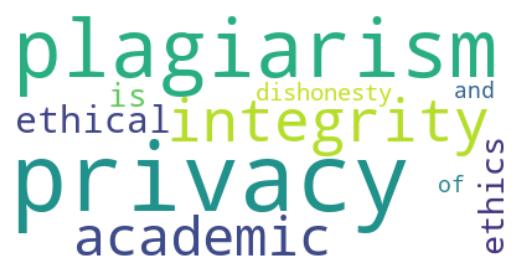

In [33]:
create_wordcloud(model, topic=21)

In [11]:
model.visualize_topics()

In [32]:
topics_to_include = list(range(1, 44))
model.visualize_barchart(topics= topics_to_include, width=300)